<a href="https://colab.research.google.com/github/AngelSusanVino/Exploratory-Data-Analysis/blob/main/20MIA1068_LAB_1_BD_EDA_FOR_SUPERSTORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libaries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # used to ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Importing the dataset**

In [4]:
df = pd.read_csv("/content/Sample - Superstore.csv", encoding="ISO-8859-1")

**Data Exploartion**

In [5]:
df.shape

(9994, 21)

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**Checking the data and missing values**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
# what about duplication
df.duplicated().sum()

0

**Lets see what is there in the data**


***1. What are the top selling products in the superstore?***

In [10]:
Sales_info = df[["Product Name", "Sales"]]
Sales_info = Sales_info.groupby('Product Name').sum()
Sales_info = Sales_info.sort_values('Sales', ascending=False)
Sales_info.head()

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479


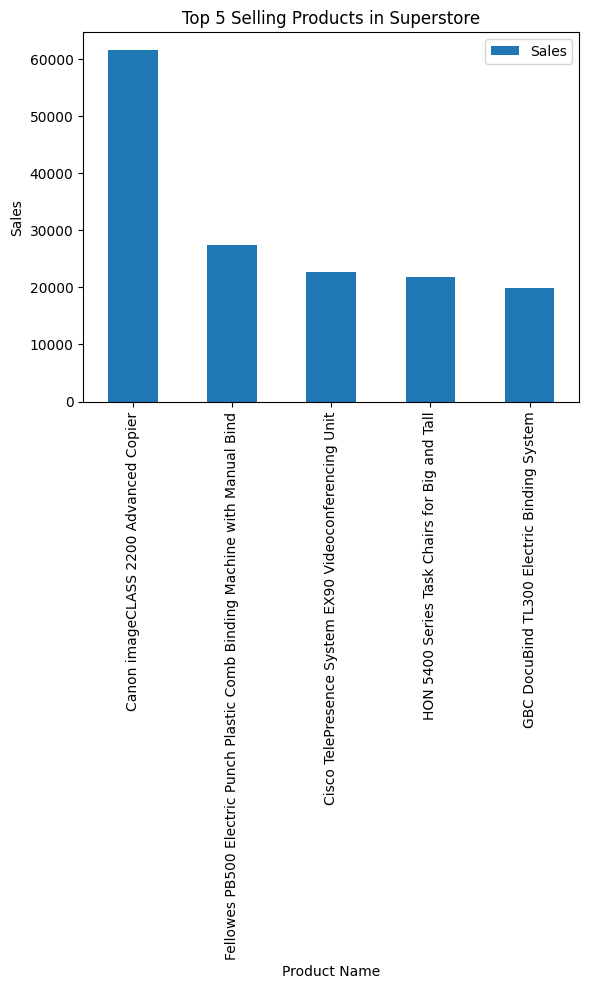

In [11]:
top_5_selling_products = pd.DataFrame(Sales_info[:5])
top_5_selling_products.plot(kind="bar")

plt.title("Top 5 Selling Products in Superstore")

plt.xlabel("Product Name")
plt.ylabel("Sales")

plt.show()

***2.Top profitable products?***

In [12]:
profit_info = df[["Product Name", "Profit"]]
profit_info = profit_info.groupby('Product Name').sum()
profit_info = profit_info.sort_values('Profit', ascending=False)
profit_info.head()

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766


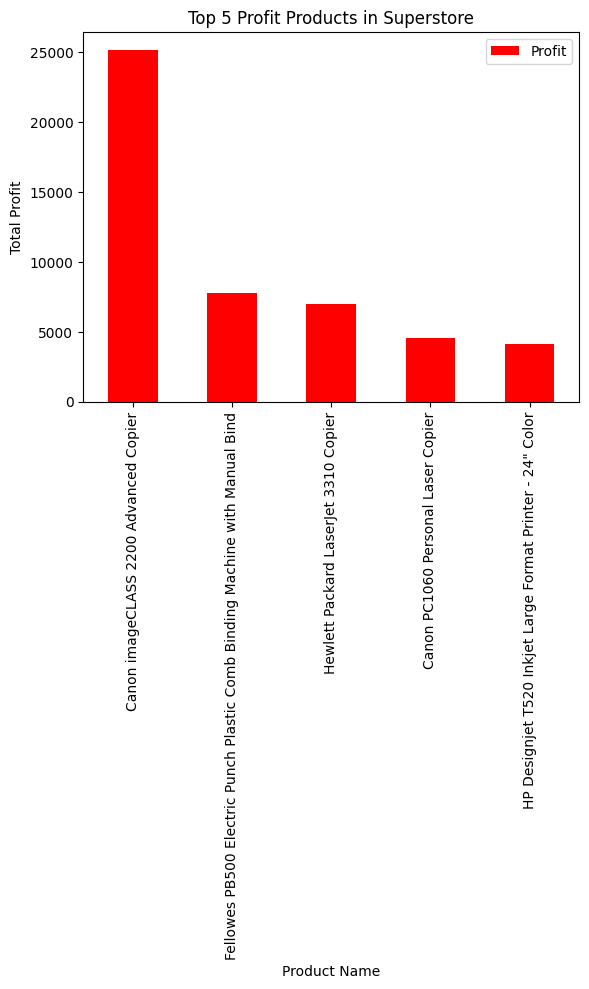

In [15]:
top_5_profit_products =pd.DataFrame(profit_info[:5])

top_5_profit_products.plot(kind="bar",color = 'red')

plt.title("Top 5 Profit Products in Superstore")

plt.xlabel("Product Name")
plt.ylabel("Total Profit")

plt.show()

We can conculed from this the highest selling products, and the most profitable are Canon imageCLASS 2200 Advanced Copier and
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind


***3.Profit in all regions***

In [16]:
df.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

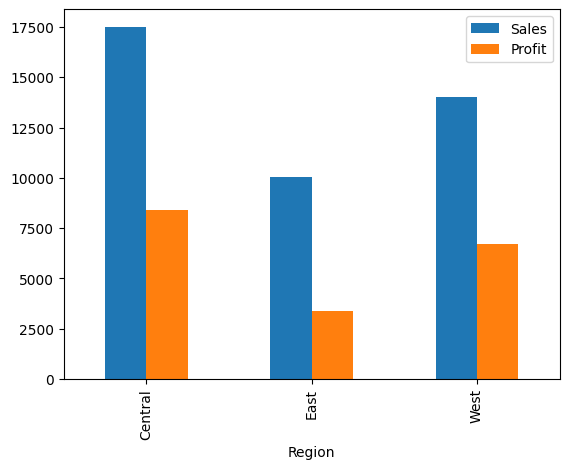

In [17]:
product = df[df["Product Name"] == "Canon imageCLASS 2200 Advanced Copier"]
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]

region_group.plot(kind="bar")

plt.show()

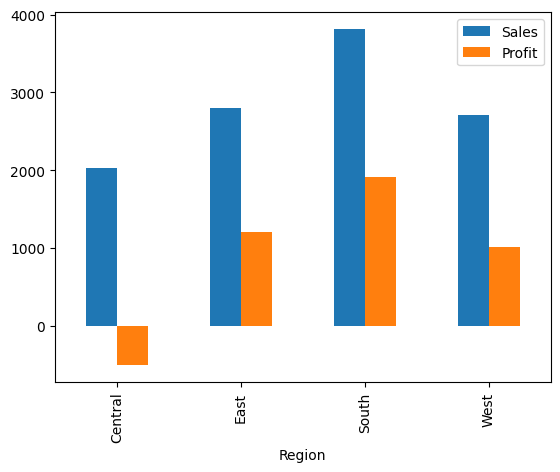

In [18]:
product = df[df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]
region_group.plot(kind="bar")
plt.show()

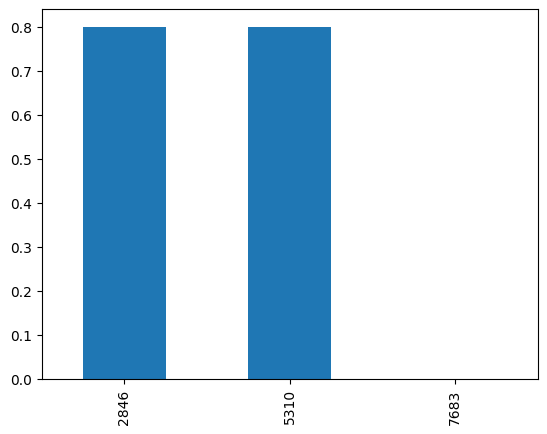

In [19]:
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]

product["Discount"].plot(kind="bar")

plt.show()

The company loses when it sells its Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind products in the Central! as it make 80% discount on 2 products from 3 products

***4.What is the profit trend over time monthly?***

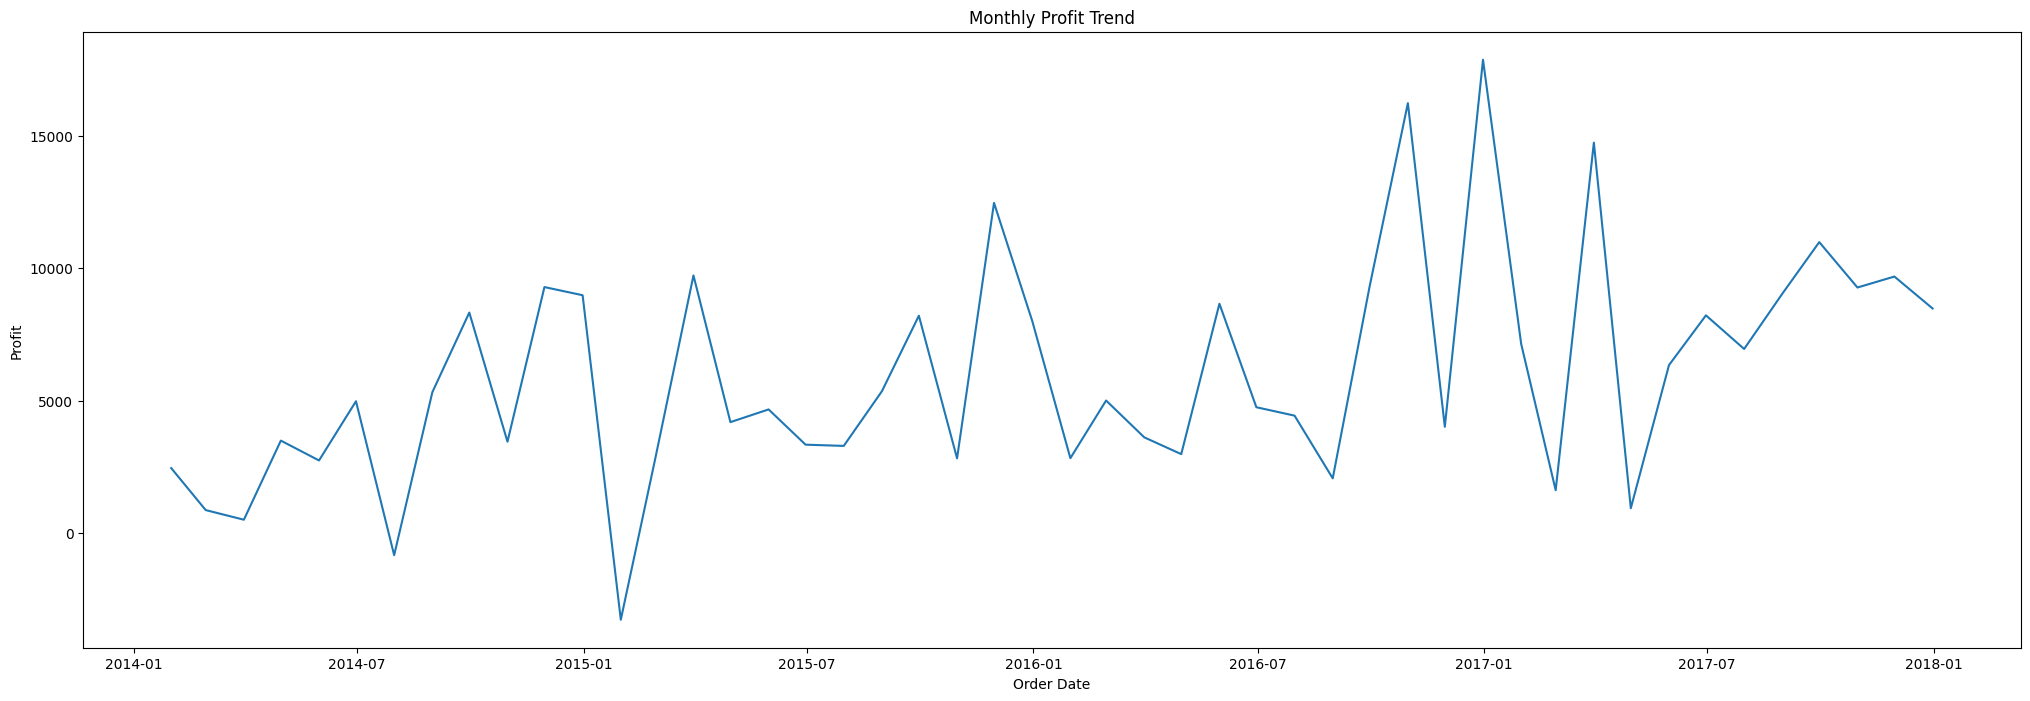

In [20]:
monthly_Profit = df.groupby(['Order Date'], as_index=False).sum()
monthly_Profit = monthly_Profit.set_index('Order Date')
monthly_Profit = monthly_Profit.resample('M').sum() # M for month

plt.figure(figsize=(25,8))
plt.plot(monthly_Profit['Profit'])
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.title("Monthly Profit Trend")
plt.show()

***5.What is the profit trend over time yearly?***

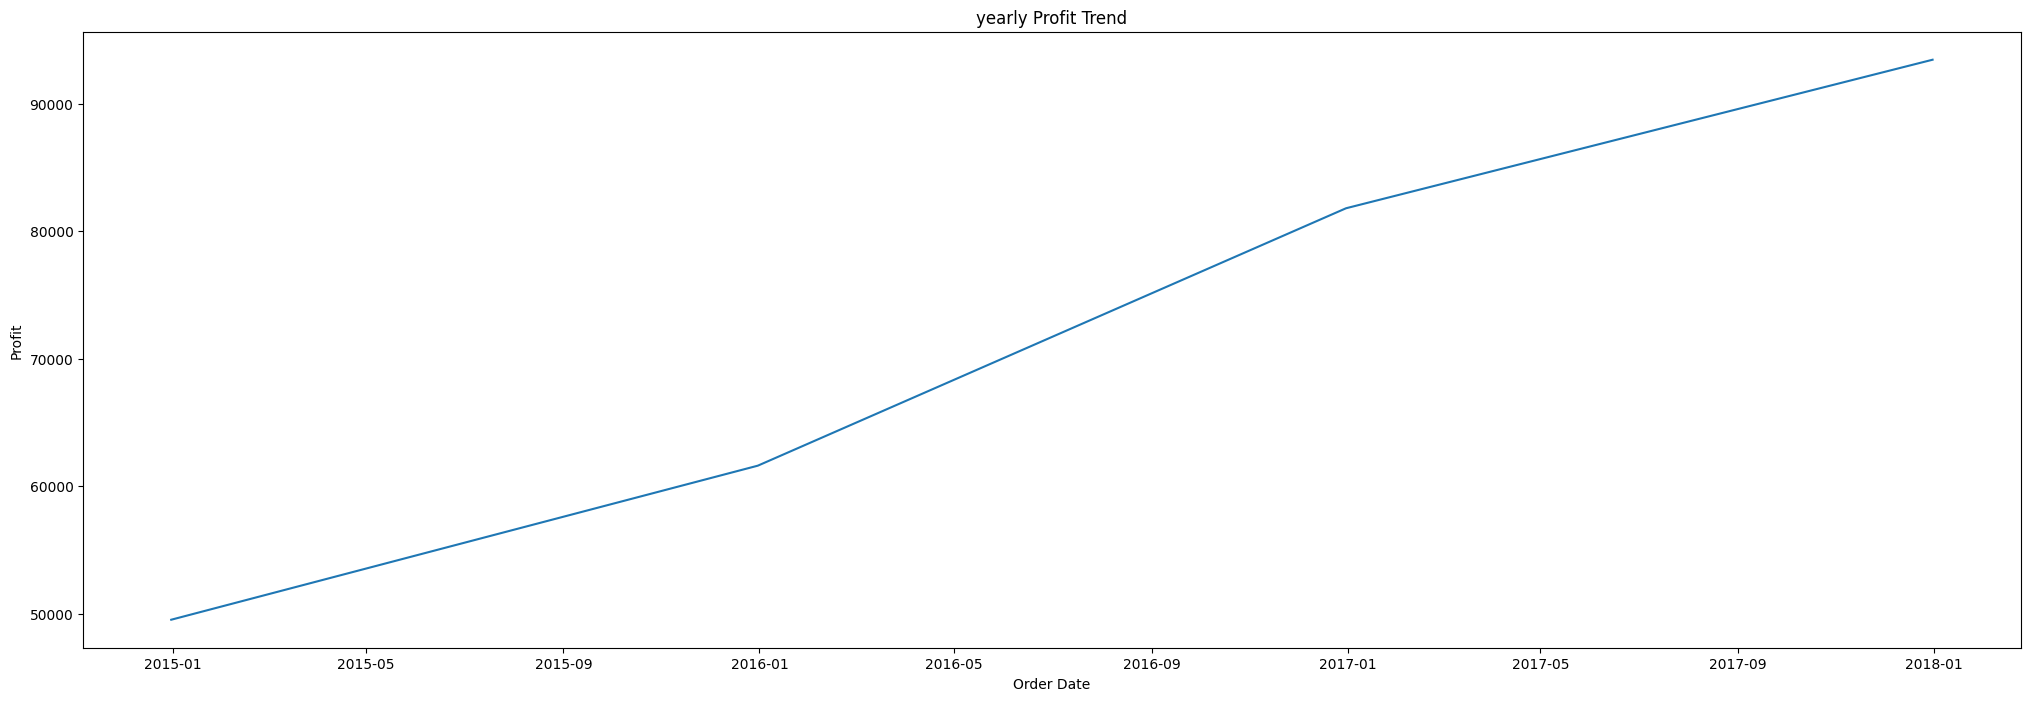

In [21]:
yearly_Profit = monthly_Profit.resample('Y').sum()
plt.figure(figsize=(25,8))
plt.plot(yearly_Profit['Profit'])
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.title("yearly Profit Trend")
plt.show()

***6.Which region generates the most sales?***

In [22]:
df_places = df[['Region','Sales','Profit']]
# Group the data by Region and City and calculate the total sales for each group
grouped_data = df_places.groupby(['Region'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)
grouped_data.head(5)

,Region,Sales,Profit
3,West,725457.8245,108418.4489
1,East,678781.2400,91522.7800
0,Central,501239.8908,39706.3625
2,South,391721.9050,46749.4303


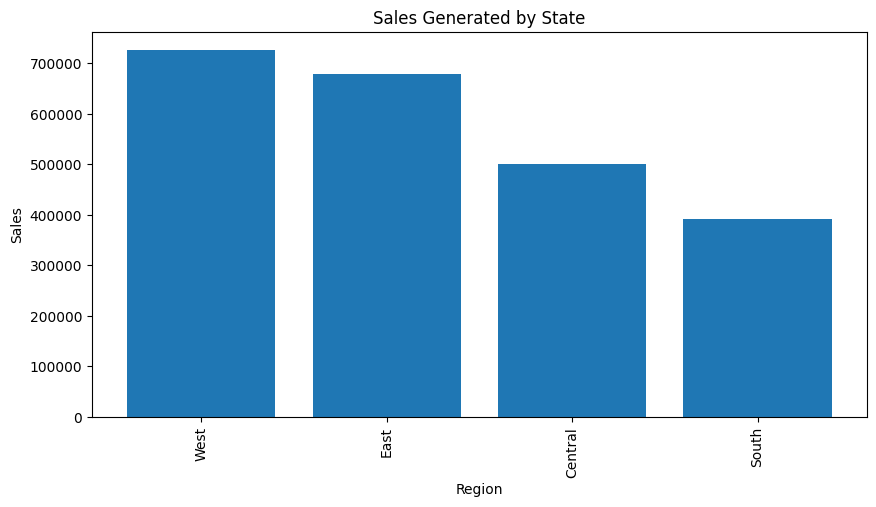

In [23]:
plt.figure(figsize=(10,5))
plt.bar(grouped_data['Region'], grouped_data['Sales'], align='center',)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()

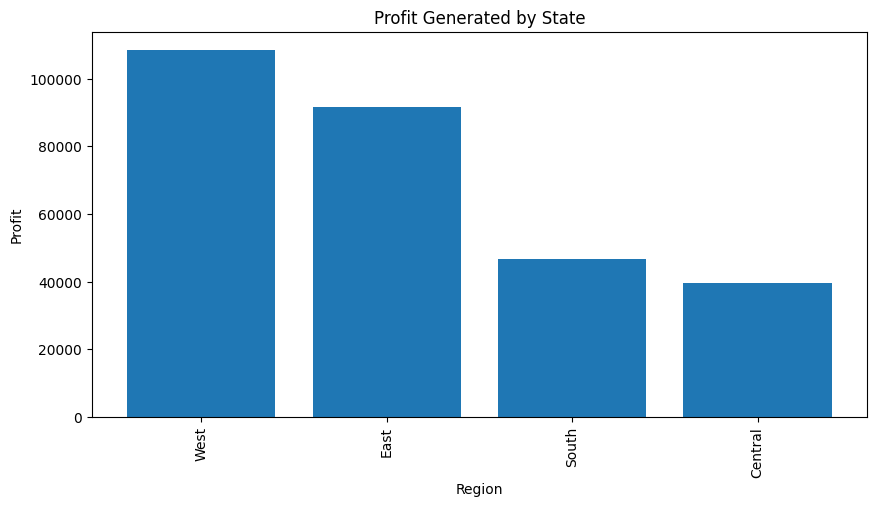

In [24]:
grouped_data = df_places.groupby(['Region'], as_index=False).sum()
grouped_data.sort_values(by='Profit', ascending=False, inplace=True)

plt.figure(figsize=(10,5))
plt.bar(grouped_data['Region'], grouped_data['Profit'], align='center',)
plt.xlabel("Region")
plt.ylabel("Profit")
plt.title("Profit Generated by State")
plt.xticks(rotation=90)

plt.show()

***7.Which state generates the most sales ans profit?***

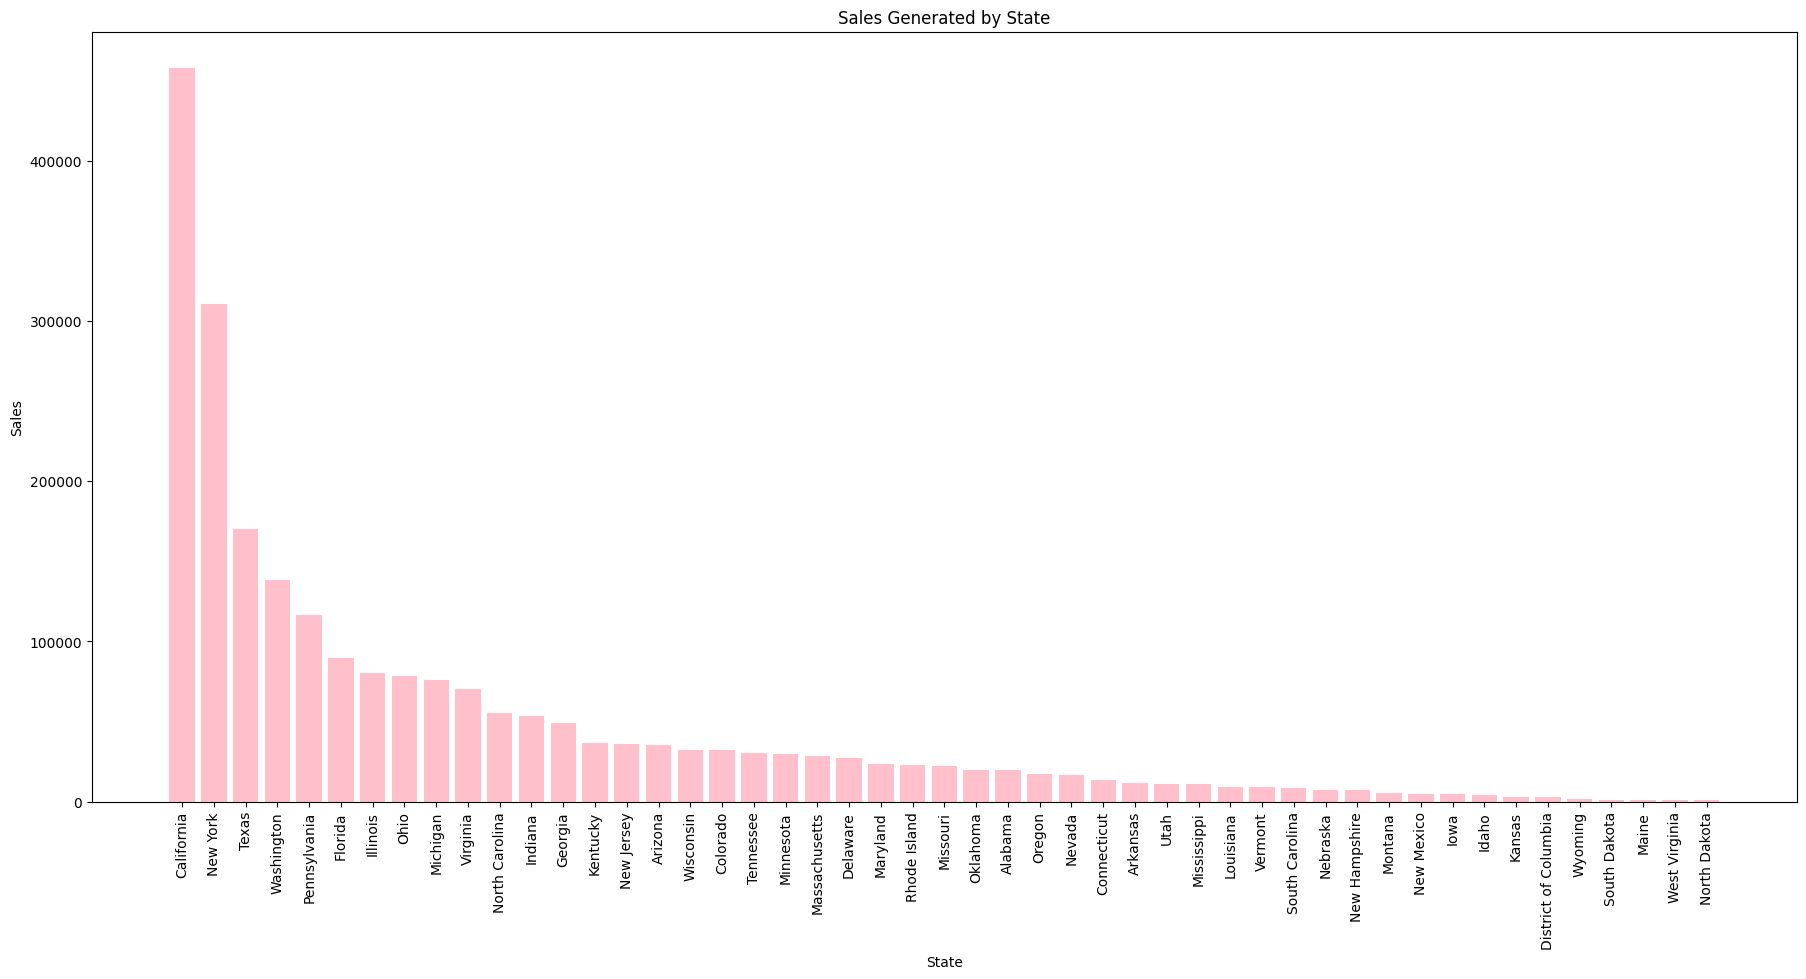

In [25]:
df_places = df[['State','Sales']]

grouped_data = df_places.groupby(['State'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)


plt.figure(figsize=(22,10))
plt.bar(grouped_data['State'], grouped_data['Sales'], align='center',color ='pink',)
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()

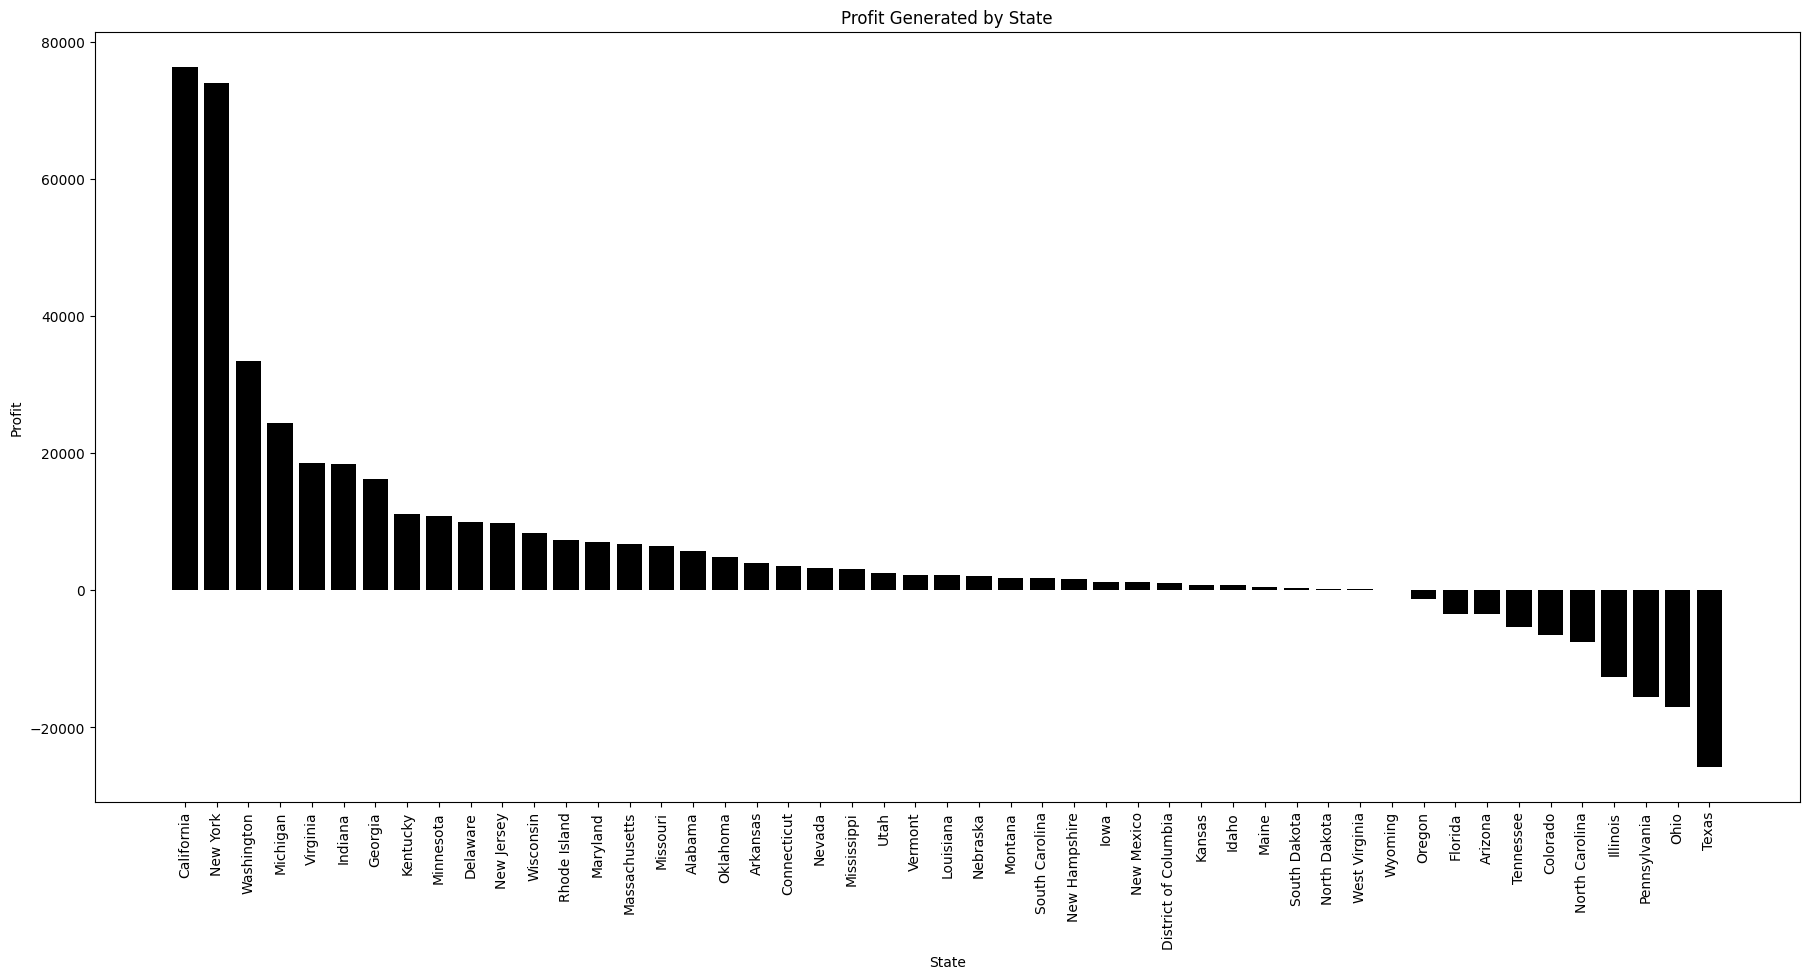

In [27]:
df_places = df[['State','Profit']]

grouped_data = df_places.groupby(['State'], as_index=False).sum()
grouped_data.sort_values(by='Profit', ascending=False, inplace=True)


plt.figure(figsize=(22,10))
plt.bar(grouped_data['State'], grouped_data['Profit'], align='center',color='black',)
plt.xlabel("State")
plt.ylabel("Profit")
plt.title("Profit Generated by State")
plt.xticks(rotation=90)

plt.show()

We notice important thing that texas is the third of most sales but it loses alot of mony cause of th discounts

***8.What is the average profit margin for each product category?***

In [28]:
df2 = pd.DataFrame()
df2 = df[['Category', 'Sales', 'Profit']]
df2['margine'] = df2['Profit'] / df2['Sales']
category_info = df2.groupby("Category").mean().reset_index()
category_info

,Category,Sales,Profit,margine
0,Furniture,349.834887,8.699327,0.038784
1,Office Supplies,119.324101,20.327050,0.138030
2,Technology,452.709276,78.752002,0.156138


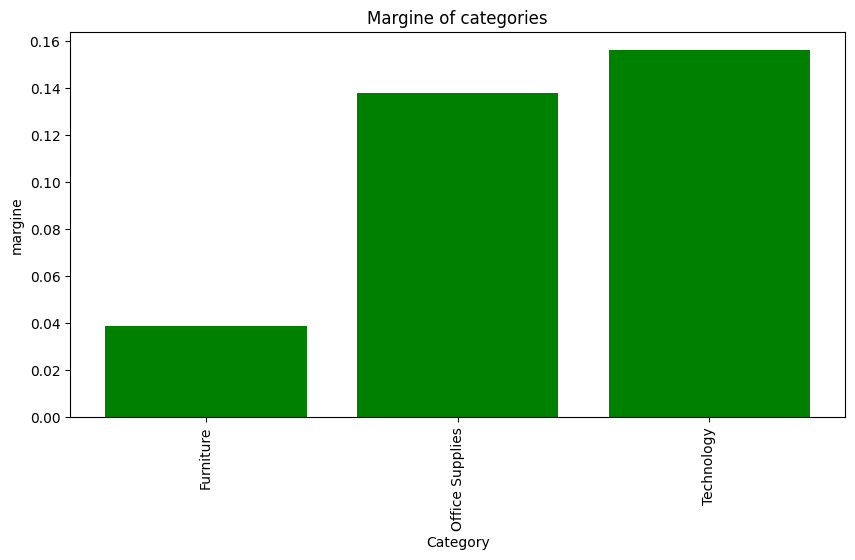

In [29]:
plt.figure(figsize=(10,5))
plt.bar(category_info['Category'], category_info['margine'], align='center',color='green')
plt.xlabel("Category")
plt.ylabel("margine")
plt.title("Margine of categories")
plt.xticks(rotation=90)

plt.show()

We can notice that the Technology is making the higher profit margin and best sells

***9.Was there any growing trend on Superstore's number of orders?***



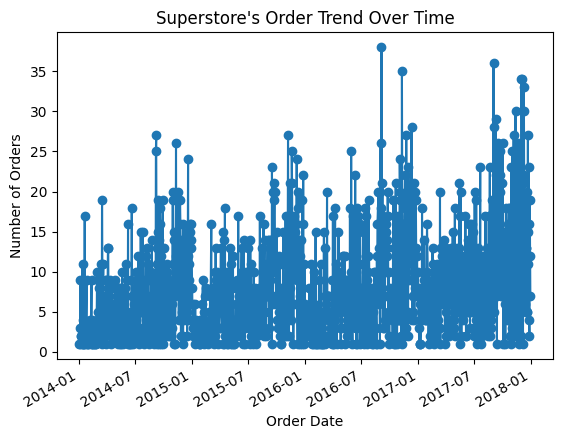

In [36]:
# Count orders over time and plot the trend
order_trend = df.groupby('Order Date')['Order ID'].count()
order_trend.plot(kind='line', marker='o')
plt.title("Superstore's Order Trend Over Time")
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.show()

***10.Throughout the week, which day of week customers ordered the most from Superstore?***




In [37]:
# Calculate the total number of orders for each day of the week
day_of_week_counts = df['Order Date'].dt.dayofweek.value_counts()

# Find the day with the most orders
most_ordered_day = day_of_week_counts.idxmax()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
most_ordered_day_name = days_of_week[most_ordered_day]
print(f"The day of the week with the most orders is {most_ordered_day_name}.")


The day of the week with the most orders is Monday.


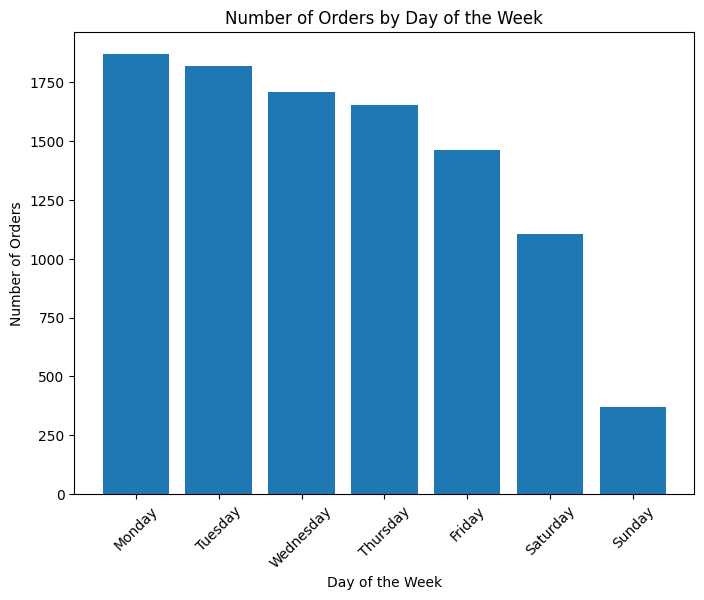

In [39]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(days_of_week, day_of_week_counts)
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

***11.Which month customers ordered the most from Superstores?***

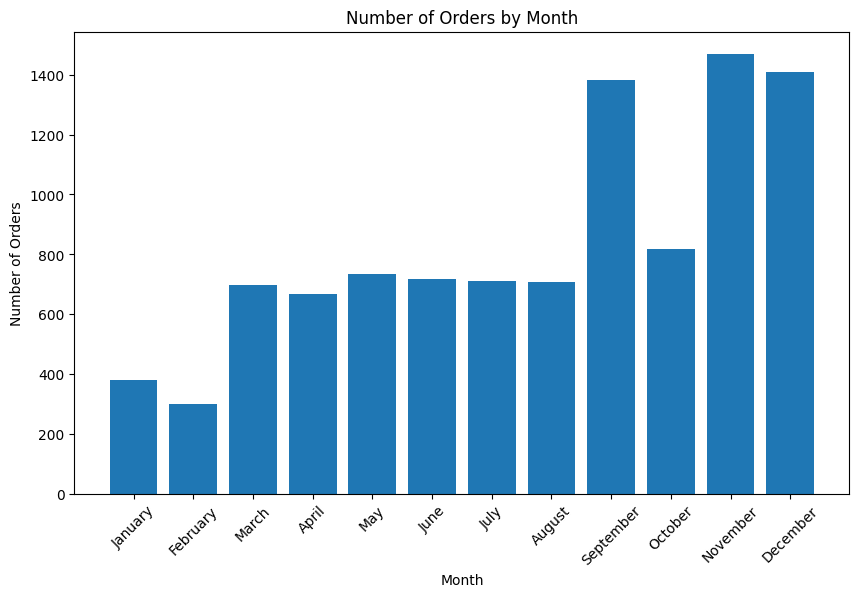

In [42]:
import matplotlib.pyplot as plt

# Calculate the total number of orders for each month
month_counts = df['Order Date'].dt.month.value_counts().sort_index()

# Define the month names for labeling
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, month_counts)
plt.title('Number of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


The month with the highest number of orders is November.